# Creation of the dataframe

In [85]:
# this code is to delete the first three block in a json file that says " user yyy join the channel"
import os
import json
import pandas as pd
import seaborn as sns

In [ ]:
main_folder_path = '/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/SplitOfConversationbyTopic/textAnalysisByTopic/'

for subdir, _, files in os.walk(main_folder_path):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r') as f:
                data = json.load(f)
            new_data = [msg for msg in data if not ('type' in msg and msg['type'] == 'message' and 'subtype' in msg and msg['subtype'] == 'channel_join')]
            with open(file_path, 'w') as f:
                json.dump(new_data, f, indent=4)

In [43]:

# Set the path to the main folder containing all the topic directories
main_folder_path = '/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/SplitOfConversationbyTopic/textAnalysisByTopic/'

# Initialize an empty list to store the data for each topic
all_topic_data = []

# Iterate over all the topic directories
for topic_dir in os.listdir(main_folder_path):
    # Check if the current directory is a folder (not a file)
    if os.path.isdir(os.path.join(main_folder_path, topic_dir)):
        # Iterate over all the JSON files in the current topic directory
        for filename in os.listdir(os.path.join(main_folder_path, topic_dir)):
            if filename.endswith('.json'):
                # Load the JSON file
                with open(os.path.join(main_folder_path, topic_dir, filename), 'r') as f:
                    data = json.load(f)
                
                # Extract the information needed for the DataFrame
                user_id = filename.split('_')[0]
                topic_id = topic_dir[:min(15, len(topic_dir))]
                queries = []
                answers = []
                i = 0
                while i < len(data):
                    message = data[i]
                    if message['user'] == 'U04RH7PFJ6Q' or message['user'] == 'U04Q81LB5SL':
                        if "se ha unido al canal" not in message['text']:
                            queries.append(message['text'])
                        i += 1
                        if i < len(data):
                            message = data[i]
                            if message['user'] == 'U04PWT3LZG9':
                                answers.append(message['text'])
                                i += 1
                            else:
                                answers.append(None)
                        else:
                            answers.append(None)
                    else:
                        i += 1
                        queries.append(None)
                        answers.append(None)

                # Pad the lists with None values if needed
                num_queries = len(queries)
                num_answers = len(answers)
                if num_queries < 11:
                    queries += [None] * (11 - num_queries)
                if num_answers < 11:
                    answers += [None] * (11 - num_answers)

                # Interleave the queries and answers
                topic_data = [user_id, topic_id]
                for i in range(11):
                    topic_data += [queries[i], answers[i]]

                all_topic_data.append(topic_data)

# Create the DataFrame
header = ["UserID", "TopicID", "Query1", "Answer1", "Query2", "Answer2", "Query3", "Answer3", "Query4", "Answer4", "Query5", "Answer5", "Query6", "Answer6", "Query7", "Answer7", "Query8", "Answer8", "Query9", "Answer9", "Query10", "Answer10", "Query11", "Answer11"]
df = pd.DataFrame(all_topic_data, columns=header)

# Print the DataFrame
print(df)




   UserID  TopicID                                             Query1  \
0   bot17  running  &gt; I took a year-long break from running due...   
1   bot22  running  Well, I am planning to get back to running (jo...   
2   bot23  running           tips to restart running after long break   
3   bot10  running  Hi bot! I need an advice on going back to run!...   
4   bot24  running  You took a year-long break from running due to...   
5   bot21  running  &gt; I took a year-long break from running due...   
6   bot20  running  &gt; You took a year-long break from running d...   
7   bot11  running  I took a year-long break from running because ...   
8   bot14  running  You took a year-long break from running due to...   
9   bot17  nigeria  Can you tell me some interesting information a...   
10  bot10  nigeria  My friend wanted to make a trip to Nigeria, bu...   
11  bot16  nigeria  My friend asked for something interesting info...   
12  bot18  nigeria  My friend will travel to Nigeri

In [44]:
#deleting the "" of some sentences and also the string &gt; that was at the beginning of some sentences

import pandas as pd

df["Query1"] = df["Query1"].str.replace(r'^"|"$', '', regex=True)  # remove double quotes from beginning and end of strings
df["Query1"] = df["Query1"].str.replace(r'^(>|&gt;)\s*', '', regex=True)  # remove "> " or "&gt; " from beginning of strings

# Save the DataFrame to a CSV file
df.to_csv('dataframeNew.csv', index=False)

# Qualtrics Result Dataframe

In [100]:
import pandas as pd

# read the CSV file and skip rows 1 and 3
df = pd.read_csv('/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/QualtricsResult.csv', skiprows=[2])

# select columns from Q1 to Q6
df_new = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']]

# set the new column names
new_columns = ['User Number', 'Age', 'Education', 'Background', 'ExperienceSearching', 'Gender']
df_new.columns = new_columns

# drop the first row
df_new = df_new.drop(index=0)

# print the modified dataframe
print(df_new)


   User Number      Age                                  Education  \
1            1  23 - 27                                     master   
2           11  23 - 27                                     Master   
3           12  23 - 27                                     Master   
4           13  28 - 32                                   bachelor   
5           14  23 - 27                                     master   
6           15  23 - 27                                     Master   
7           16  over 33                                        Bsc   
8           17  over 33                                     Master   
9           18  28 - 32                                          -   
10          19  over 33                                   Bachelor   
11          20  18 - 22                            scuola mestieri   
12          21  over 33                                        phd   
13          22  over 33  Master (complete). PhD student (ongoing).   
14          23  18 -

In [81]:
df_new.to_csv('qualtricsDataFrame.csv', index=False)

# Text Analysis

## Similarity Matrix

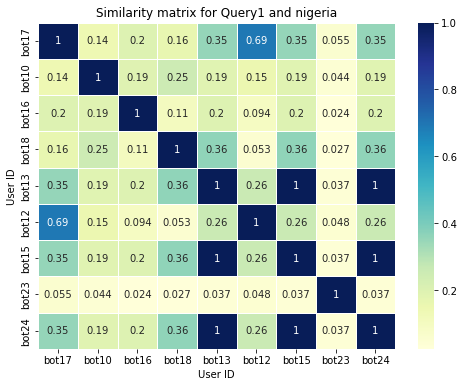

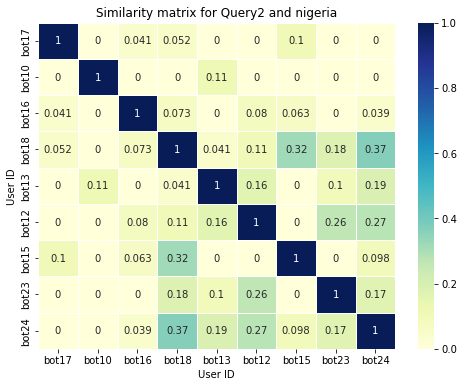

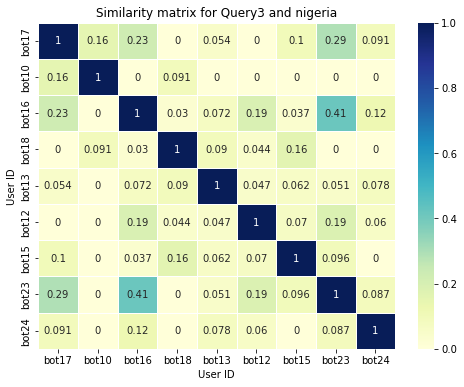

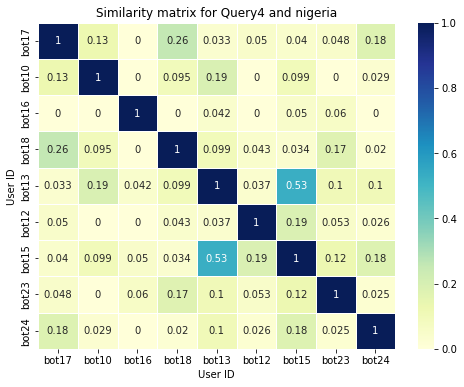

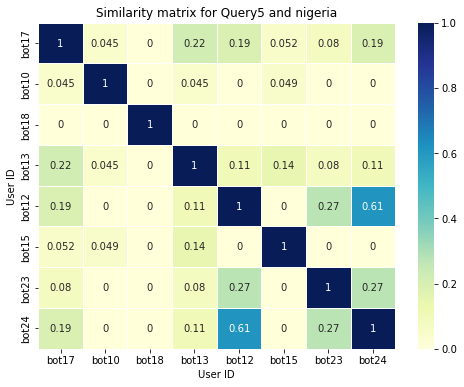

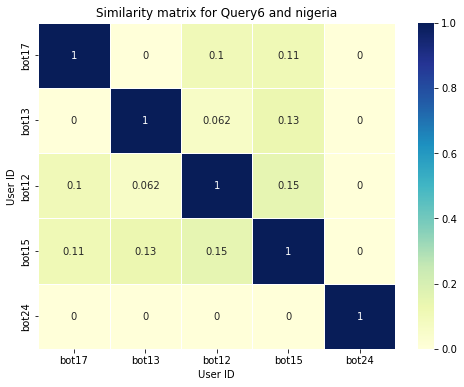

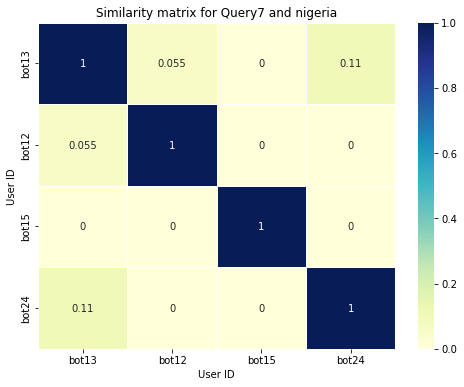

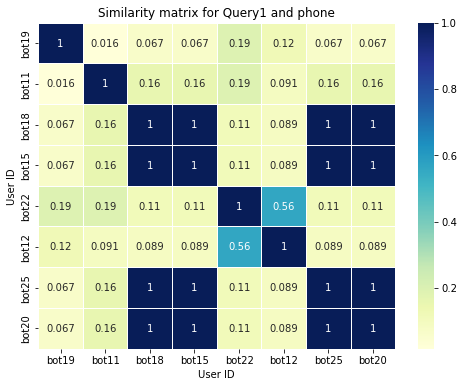

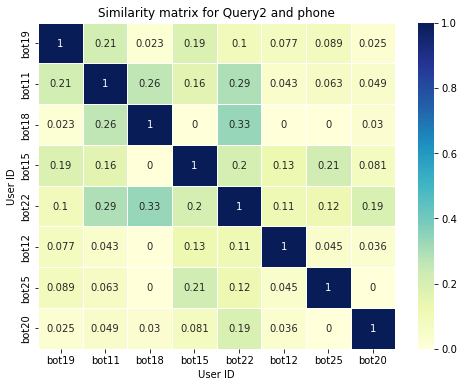

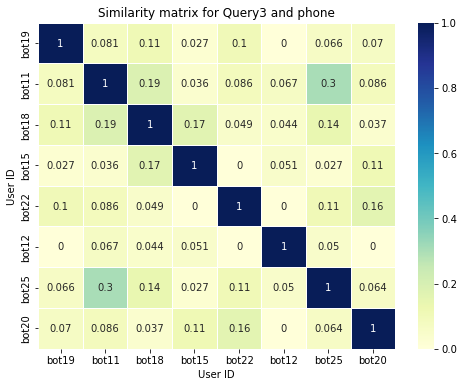

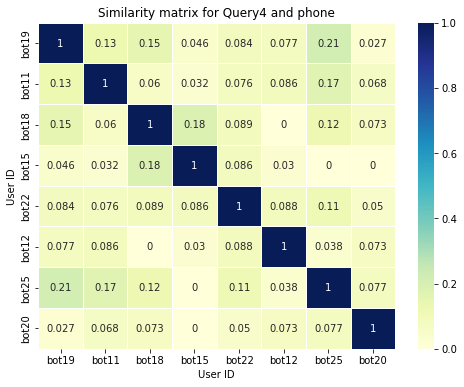

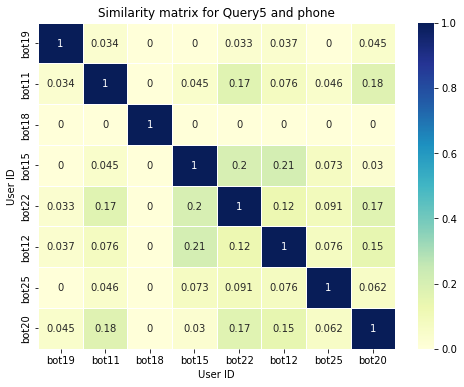

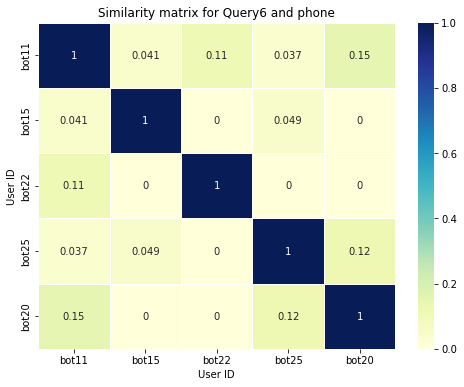

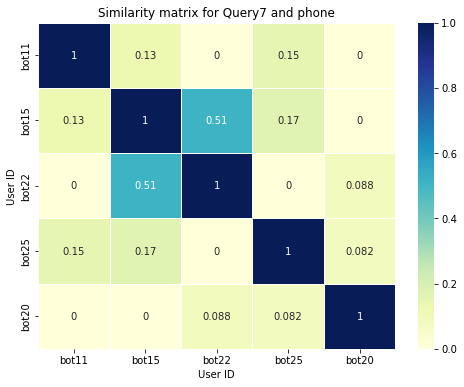

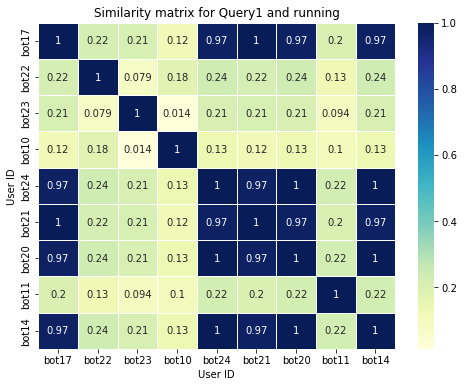

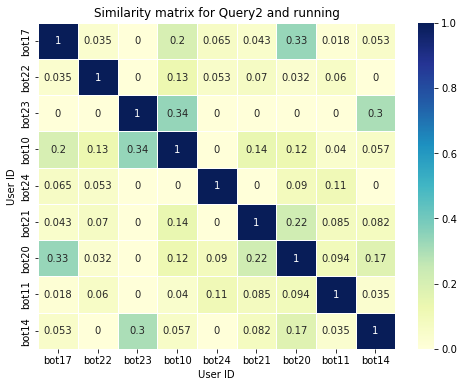

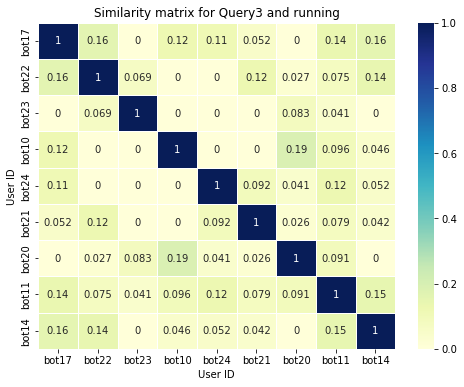

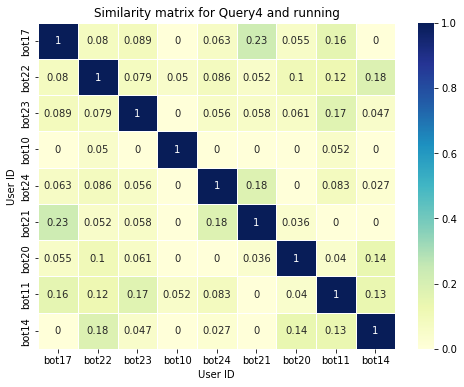

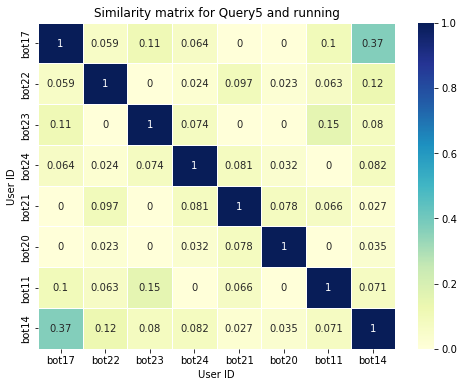

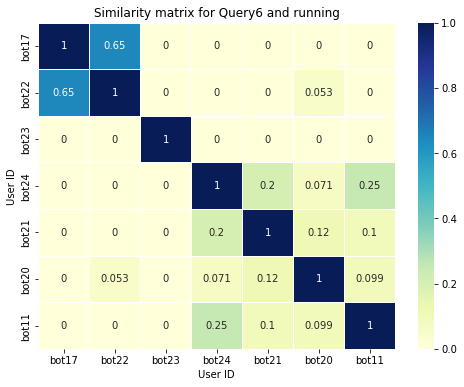

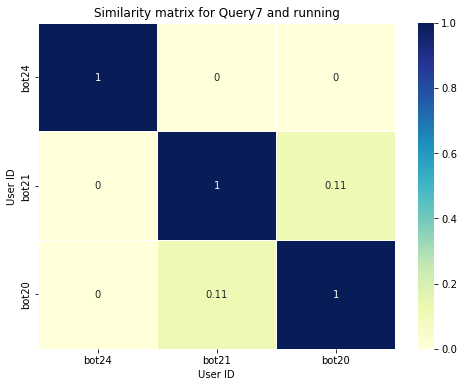

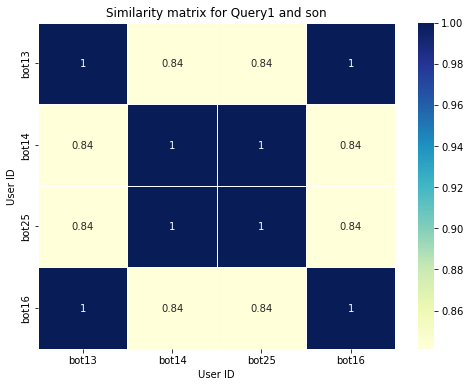

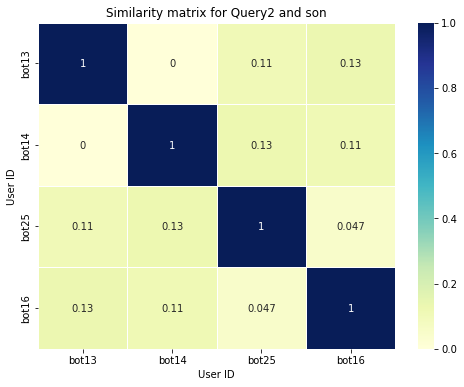

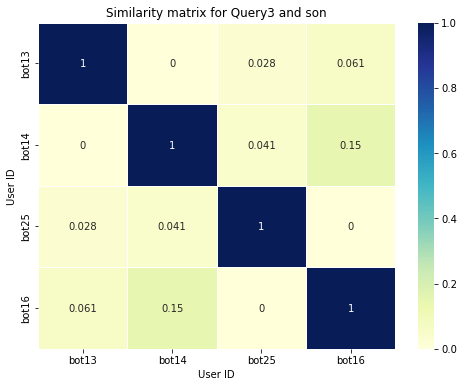

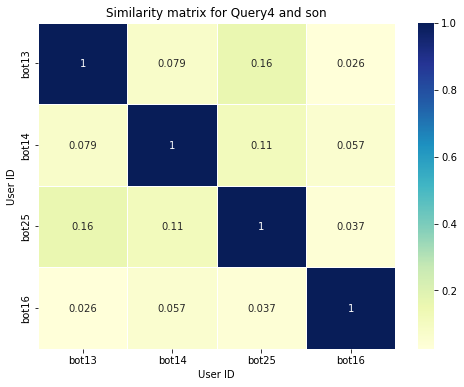

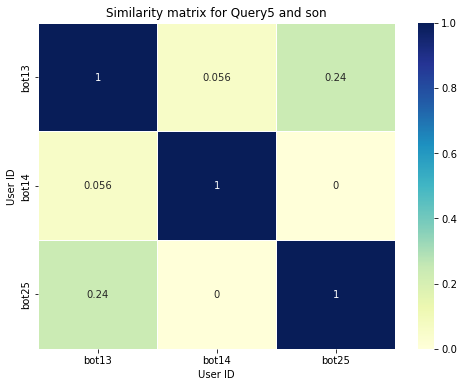

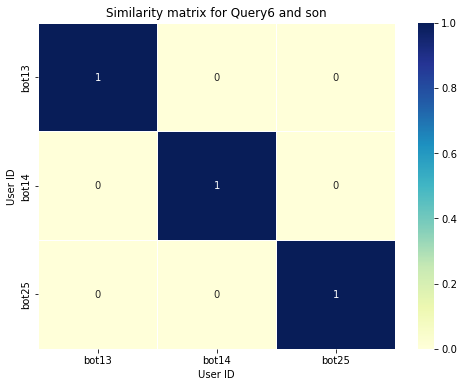

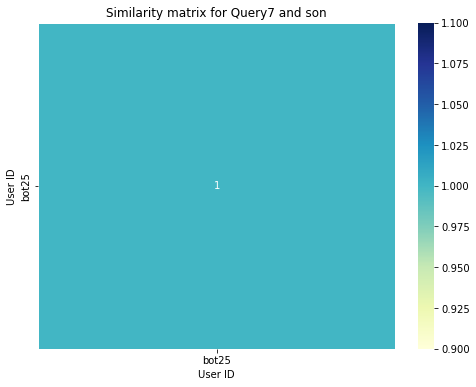

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataframe
df = pd.read_csv('dataframeNew.csv')

# Group the dataframe by TopicID
grouped = df.groupby('TopicID')

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Loop through each TopicID
for topic, group in grouped:

    # Loop through each query number (1-11)
    for i in range(1, 8):
        query_column = 'Query' + str(i)

        # Get the user IDs and answers for the current query number
        user_answers = group[['UserID', query_column, 'TopicID']]
        user_answers = user_answers.dropna()

        # Vectorize the user answers for the current query number
        vectors = vectorizer.fit_transform(user_answers[query_column])

        # Calculate the cosine similarity between each pair of users
        similarity_matrix = ‹‹››››››››(vectors)

        # Convert the similarity matrix to a dataframe
        similarity_df = pd.DataFrame(similarity_matrix, index=user_answers['UserID'], columns=user_answers['UserID'])
        

        # Create a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", linewidth=.5)
        plt.title(f'Similarity matrix for {query_column} and {topic}')
        plt.xlabel('User ID')
        plt.ylabel('User ID')
        plt.show()
        
        #pdf.savefig()
        #plt.close()

# Close the PDF file
#pdf.close()


## Mean and Standard Deviation based on the similarity matrix

    TopicID  QueryNumber  MeanSimilarity  StdDevSimilarity
0   nigeria            1        0.262209          0.260383
1   nigeria            2        0.078363          0.099368
2   nigeria            3        0.080599          0.090479
3   nigeria            4        0.084255          0.099797
4   nigeria            5        0.087865          0.132416
5   nigeria            6        0.055992          0.059977
6     phone            1        0.316824          0.368244
7     phone            2        0.109915          0.093672
8     phone            3        0.079458          0.065780
9     phone            4        0.079784          0.052641
10    phone            5        0.065605          0.067082
11    phone            6        0.050441          0.053273
12  running            1        0.398193          0.366824
13  running            2        0.082529          0.092536
14  running            3        0.064569          0.057171
15  running            4        0.067212          0.0611

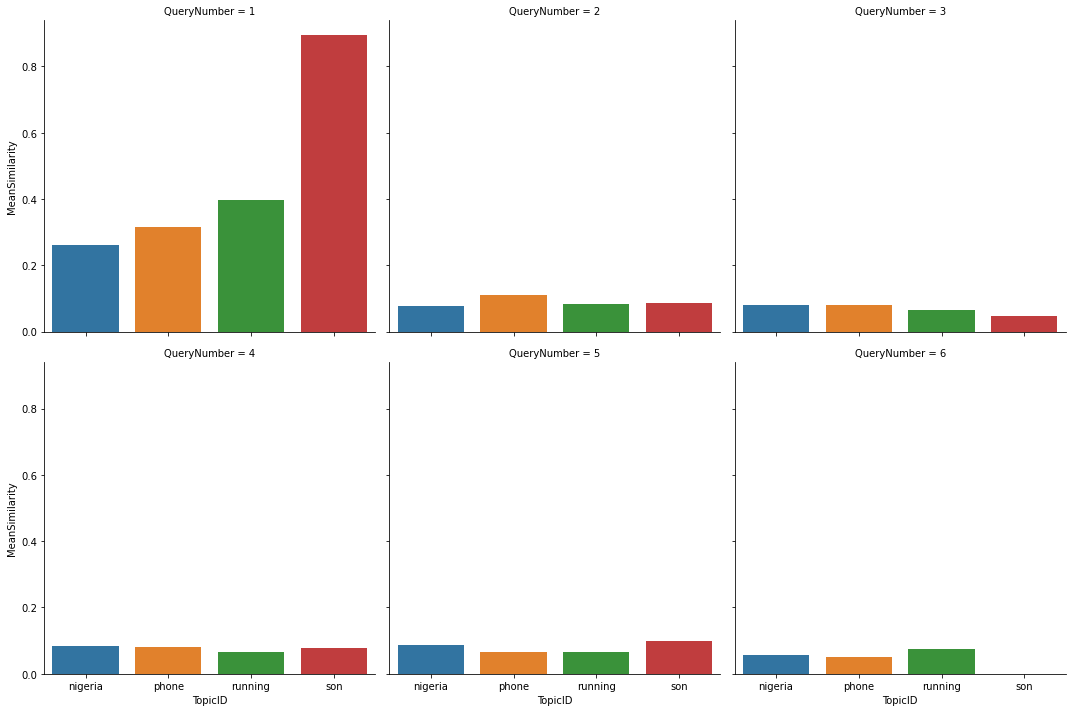

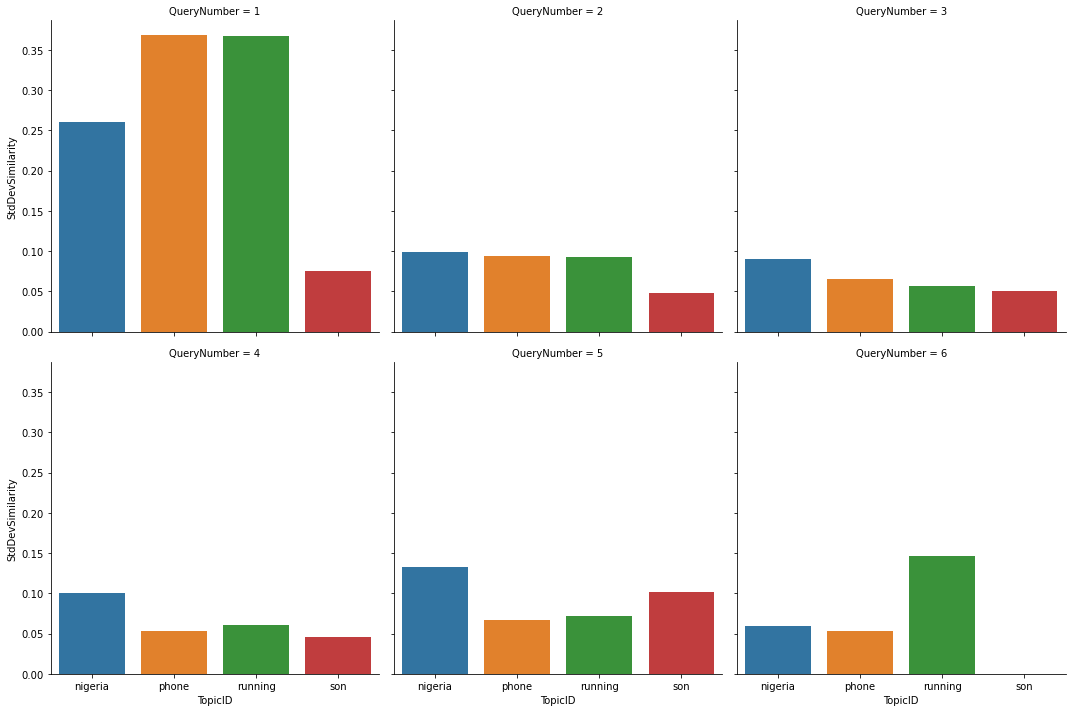

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataframe
df = pd.read_csv('dataframeNew.csv')

# Group the dataframe by TopicID
grouped = df.groupby('TopicID')

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Create an empty list to store the results
results = []

# Loop through each TopicID
for topic, group in grouped:

    # Loop through each query number (1-7)
    for i in range(1, 7):
        query_column = 'Query' + str(i)

        # Get the user IDs and answers for the current query number
        user_answers = group[['UserID', query_column, 'TopicID']]
        user_answers = user_answers.dropna()

        # Vectorize the user answers for the current query number
        vectors = vectorizer.fit_transform(user_answers[query_column])

        # Calculate the cosine similarity between each pair of users
        similarity_matrix = cosine_similarity(vectors)

        # Calculate the mean and standard deviation of the similarity scores
        similarity_scores = similarity_matrix[np.triu_indices(similarity_matrix.shape[0], k=1)]
        mean_similarity = np.mean(similarity_scores)
        std_dev_similarity = np.std(similarity_scores)

        # Append the results to the list
        results.append([topic, i, mean_similarity, std_dev_similarity])

# Convert the list to a dataframe
results_df = pd.DataFrame(results, columns=['TopicID', 'QueryNumber', 'MeanSimilarity', 'StdDevSimilarity'])

# Pivot the dataframe to create a heatmap
heatmap_df = results_df.pivot(index='TopicID', columns='QueryNumber', values='MeanSimilarity')


print(results_df)

# Plot the mean similarity scores
sns.catplot(x='TopicID', y='MeanSimilarity', col='QueryNumber', data=results_df, kind='bar', col_wrap=3)
plt.show()

# Plot the standard deviation of the similarity scores
sns.catplot(x='TopicID', y='StdDevSimilarity', col='QueryNumber', data=results_df, kind='bar', col_wrap=3)
plt.show()



The StdDevSimilarity represents the standard deviation of the similarity scores. It measures the amount of variation or dispersion in the similarity scores. A high standard deviation indicates that the similarity scores are widely spread out from the mean, while a low standard deviation indicates that the similarity scores are clustered around the mean.

Together, the MeanSimilarity and StdDevSimilarity can provide insight into how consistent the users are in their answers to the same query under the same topic. For example, a high MeanSimilarity and a low StdDevSimilarity would suggest that the users tend to provide similar answers to the same query under the same topic, while a low MeanSimilarity and a high StdDevSimilarity would suggest that the users tend to provide diverse answers to the same query under the same topic.


## Most used words per query

In [21]:
import pandas as pd
from collections import Counter
import spacy

# Load the dataset
df = pd.read_csv('dataframeNew.csv', index_col=0)

# Define the spacy model
nlp = spacy.load("en_core_web_sm")

# Define the topics to analyze
topics = ["phone", "nigeria", "son", "running"]

# Loop over the topics
for topic in topics:
    # Filter the data for the current topic
    topic_df = df[df["TopicID"] == topic]
    
    # Loop over the queries
    for i in range(1, 12):
        # Get the sentences for the current query
        sentences = topic_df[f"Query{i}"].dropna().tolist()

        # Combine the sentences into a single string
        text = " ".join(sentences)

        # Tokenize the text
        doc = nlp(text)

        # Count the word frequencies
        word_freq = Counter([token.text for token in doc if token.is_alpha and not token.is_stop])

        # Print the 10 most common words
        print(f"\nTopic: {topic}, Query{i}")
        for word, freq in word_freq.most_common(10):
            print(f"{word}: {freq}")



Topic: phone, Query1
phone: 8
buying: 8
consider: 5
Imagine: 4
interested: 4
things: 4
new: 3
buy: 2
Hi: 2
help: 2

Topic: phone, Query2
phone: 6
looking: 3
new: 2
Android: 2
battery: 2
life: 2
storage: 2
good: 2
camera: 2
big: 2

Topic: phone, Query3
phone: 3
screen: 2
prefer: 2
awesome: 1
thanks: 1
info: 1
little: 1
cousin: 1
expert: 1
think: 1

Topic: phone, Query4
time: 2
know: 2
phones: 2
phone: 2
price: 2
iPhone: 2
calls: 2
specific: 1
apps: 1
limiting: 1

Topic: phone, Query5
phone: 3
Good: 2
Pro: 2
probably: 1
use: 1
options: 1
largest: 1
display: 1
prettier: 1
design: 1

Topic: phone, Query6
phones: 2
additional: 1
features: 1
consider: 1
quests: 1
phone: 1
suggest: 1
Great: 1
like: 1
winner: 1

Topic: phone, Query7
change: 2
topic: 2
fast: 2
Finally: 1
best: 1
phones: 1
regardless: 1
price: 1
range: 1
operating: 1

Topic: phone, Query8
charge: 2
cable: 2
Thank: 1
satisfied: 1
questions: 1
phones: 1
display: 1
important: 1
intended: 1
usage: 1

Topic: phone, Query9
Ok: 1
offe

This code loops over each topic and query, combines the sentences for each query into a single string, tokenizes the text using spaCy, counts the word frequencies, and prints the 10 most common words for each query. 
